<a href="https://colab.research.google.com/github/Yarrieta/PROBABILIDAD_Y_ESTADISTICA_IA/blob/examen2/tp2_grupo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad y Estadística para la Inteligencia Artificial
### Grupo 9

### Segundo exámen parcial

Punto 1

Encontrar los estimadores de mínimos cuadrados para los parámetros a,b y c dado el modelo $y = a + bx + cx^2$ y los siguientes valores de la tabla donde Y son los valores de producción de cierto material y X el tiempo transcurrido.


| X  | Y   |
|----|-----|
| 3  | 2   |
| 8  | 18  |
| 14 | 84  |
| 15 | 214 |
| 20 | 565 |


Con el conjunto de datos datos $(x_i,y_i)$ se busca minimizar la suma de los cuadrados de los residuos:

- $y_i=a+bx_i+cx_i^2+e_i$

A continuación se define la función de costo:

- $S(a,b,c) = \sum_{i=1}^{n}(y_i-(a+bx_i+cx_i^2))^2$

Para encontrar los estimadores de Mínimos Cuadrados derivamos la función de costo respecto a $a,b,c$. Y luego igualamos a cero para minimizar la función.

Con respecto a $a$:

- $\frac{\partial a}{\partial S}=-2\sum_{i=1}^{n}(y_i-(a+bx_i+cx_i^2))$
- $\sum_{i=1}^{n}(y_i-(a+bx_i+cx_i^2))=0$
- $\sum_{i=1}^{n}y_i=na+b\sum_{i=1}^{n}x_i+c\sum_{i=1}^{n}x_i^2$

Con respecto a $b$:

- $\frac{\partial a}{\partial S}=-2\sum_{i=1}^{n}x_i(y_i-(a+bx_i+cx_i^2))$
- $\sum_{i=1}^{n}x_i(y_i-(a+bx_i+cx_i^2))=0$
- $\sum_{i=1}^{n}x_iy_i=a\sum_{i=1}^{n}x_i+b\sum_{i=1}^{n}x_i^2+c\sum_{i=1}^{n}x_i^3$

Con respecto a $c$:
- $\frac{\partial a}{\partial S}=-2\sum_{i=1}^{n}x_i^2(y_i-(a+bx_i+cx_i^2))$
- $\sum_{i=1}^{n}x_i^2(y_i-(a+bx_i+cx_i^2))=0$
- $\sum_{i=1}^{n}x_i^2y_i=a\sum_{i=1}^{n}x_i^2+b\sum_{i=1}^{n}x_i^3+c\sum_{i=1}^{n}x_i^4$

Obtenemos el siguiente sistema de ecuaciones:

1 )  $na+b\sum_{i=1}^{n}x_i+c\sum_{i=1}^{n}x_i^2=\sum_{i=1}^{n}y_i$  
2 )  $a\sum_{i=1}^{n}x_i+b\sum_{i=1}^{n}x_i^2+c\sum_{i=1}^{n}x_i^3=\sum_{i=1}^{n}x_iy_i$  
3)   $a\sum_{i=1}^{n}x_i^2+b\sum_{i=1}^{n}x_i^3+c\sum_{i=1}^{n}x_i^4=\sum_{i=1}^{n}x_i^2y_i$

Resolviendo el sistema de ecuaciones, remplazando con los respectivos valores de la tabla y calculando las sumas necesaerios obtenemos:

Donde n = # numero de muestras

1) $5a+60b+894c=883$  
2) $60a+894b+14658c=15836$  
3) $894a+14658b+252218c=291784$  

Resolviendo el sistema de ecuaciones usando álgebra matricial podemos obtener los valores para los coeficientes $a,b,c$:

$\:a≈126.58,\:b≈−46.13,\:c≈3.38$




Coeficientes

a ≈ 126.57668678594574, b ≈-46.12932923762285, c ≈ 3.3757005820219703



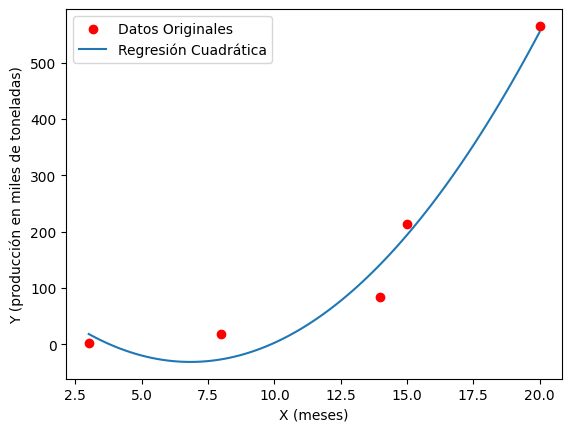

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#Creamos los datos de x e y
x = np.array([3,8,14,15,20])
y = np.array([2,18,84,214,565])

#Creamos la matrix X que incluye el termino X^2
x_term = np.column_stack((np.ones_like(x), x, x**2))

#Se ajusta el modelo
coeficientes, _, _, _ = np.linalg.lstsq(x_term, y,rcond=None)

#imprimimos los coeficientes
print("Coeficientes")
print()
print(f'a ≈ {coeficientes[0]}, b ≈{coeficientes[1]}, c ≈ {coeficientes[2]}')
print()

#graficamos los puntos originales
plt.scatter(x, y, color='red', label='Datos Originales')

#graficamos la curva ajustada
x_plot = np.linspace(min(x), max(x), 100)
y_plot = coeficientes[0] + coeficientes[1] * x_plot + coeficientes[2] * x_plot ** 2
plt.plot(x_plot, y_plot, label='Regresión Cuadrática')

plt.xlabel('X (meses)')
plt.ylabel('Y (producción en miles de toneladas)')
plt.legend()
plt.show()



In [8]:
#Construcción de la matriz X**2
x_term

array([[  1,   3,   9],
       [  1,   8,  64],
       [  1,  14, 196],
       [  1,  15, 225],
       [  1,  20, 400]])

In [9]:
#Resultado del sistema de ecuaciones usando álgebra matricial para obtener los valores para los coeficientes  𝑎,𝑏,𝑐 :
coeficientes

array([126.57668679, -46.12932924,   3.37570058])

Punto 2



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo
file_path = 'Datos_segundo_punto_17Co2024_Grupo9.xlsx'  # Reemplaza 'ruta_al_archivo.xlsx' con la ruta de tu archivo
df = pd.read_excel(file_path, sheet_name='Hoja1')

# Convertir la columna 'Fecha' a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el mes y el día de la semana
df['Mes'] = df['Fecha'].dt.month
df['Dia_de_la_semana'] = df['Fecha'].dt.day_name()

# Calcular las ventas promedio por mes y por día de la semana
ventas_por_mes = df.groupby('Mes')['Ventas'].sum().reset_index()
ventas_por_dia = df.groupby('Dia_de_la_semana')['Ventas'].sum().reset_index()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
# Graficar las ventas promedio por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_mes['Mes'], y=ventas_por_mes['Ventas'], palette="Blues_d")
plt.title('Ventas Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.show()

# Graficar las ventas promedio por día de la semana
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_dia['Dia_de_la_semana'], y=ventas_por_dia['Ventas'], palette="Greens_d")
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.show()

# Analisis exploratorio
print("Análisis Exploratorio:")
print("Ventas promedio por mes:")
print(ventas_por_mes)
print("\nVentas promedio por día de la semana:")
print(ventas_por_dia)

Realizando el análisis estacionario se peude concluir que:

- El mes mas adecuado para tomar vacaciones  Don Francisco es: Enero por sus bajas ventas
- El mes mas adecuado para realizar una inversión es Agosto ya que se realizan muchas ventas.
- El día de la semana que debería de contratar mas empleados debe ser el miercoles por su mayor cantidad de ventas
- El día de la semana que debería de contratar menos empleados debe ser el domingo ya que es el día que menos se vendió.

Punto 2 b

Análisis para los meses de años

In [ ]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

NUMBER_OF_MONTHS = 12

df.set_index("Fecha", inplace=True)
fig, axs = plt.subplots(ncols=3, nrows=NUMBER_OF_MONTHS)
for i in range(NUMBER_OF_MONTHS):
    month_data = df["Ventas"].iloc[df.index.month == i+1]
    sns.ecdfplot(data=month_data, ax=axs[i][0])
    sns.kdeplot(data=month_data, ax=axs[i][0], bw_adjust=.6, color='r', cumulative=True)
    sns.histplot(data=month_data, ax=axs[i][1], bins=8)
    sns.kdeplot(data=month_data, ax=axs[i][2], bw_adjust=.2, color='r')
    sns.kdeplot(data=month_data, ax=axs[i][2], bw_adjust=.4, color='g')
    sns.kdeplot(data=month_data, ax=axs[i][2], bw_adjust=.8, color='b')
    axs[i][0].grid()
    axs[i][0].set_xlabel("F. distribucion empirica " + calendar.month_name[i+1])
    axs[i][1].grid()
    axs[i][1].set_xlabel("Histograma " + calendar.month_name[i+1])
    axs[i][2].grid()
    axs[i][2].set_xlabel("KDE " + calendar.month_name[i+1])
fig.set_size_inches(20, 40)

Análisis para los días de la semana

In [ ]:
NUMBER_OF_DAYS = 7

fig, axs = plt.subplots(nrows=3, ncols=NUMBER_OF_DAYS)
for i in range(NUMBER_OF_DAYS):
    day_data = df["Ventas"].iloc[df.index.day == i+1]
    sns.ecdfplot(data=day_data, ax=axs[0][i])
    sns.kdeplot(data=day_data, ax=axs[0][i], bw_adjust=.6, color='r', cumulative=True)
    sns.histplot(data=day_data, ax=axs[1][i], bins=8)
    sns.kdeplot(data=day_data, ax=axs[2][i], bw_adjust=.2, color='r')
    sns.kdeplot(data=day_data, ax=axs[2][i], bw_adjust=.4, color='g')
    sns.kdeplot(data=day_data, ax=axs[2][i], bw_adjust=.8, color='b')
    axs[0][i].grid()
    axs[0][i].set_ylabel("F. distribucion empirica " + calendar.day_name[i])
    axs[1][i].grid()
    axs[1][i].set_ylabel("Histograma " + calendar.day_name[i])
    axs[2][i].grid()
    axs[2][i].set_ylabel("KDE " + calendar.day_name[i])
fig.set_size_inches(35, 15)